In [16]:
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
import pandas as pd

# number of data
N=4000
# size of each sample
L=2
# box size
B=100

!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


2 5 1


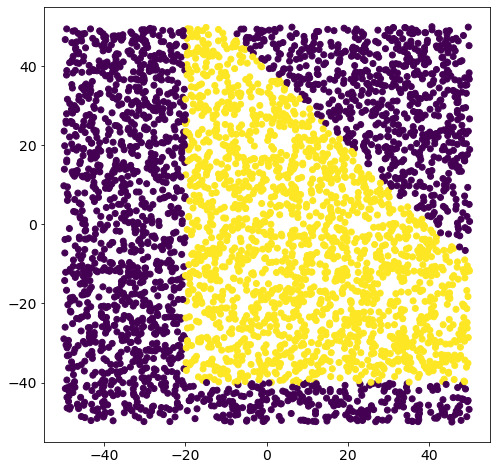

In [17]:
import numpy as np

# a nonlinear function of a 2d array x
def f(x,c=1):
    r=0
    if c==1:
        if x[0]>-20 and x[1]>-40 and x[0]+x[1] < 40:
            r=1
    if c==2:
        if (np.sign(x.sum())*np.sign(x[0]))*np.cos(np.linalg.norm(x)/(2*np.pi))>0:
            r=1
    return r


def filename(s,TYPE=1):
    return "./DATA/"+s+"-for-DNN-"+str(TYPE)+".dat"

TYPE=1

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

In [18]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout

import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 14

perc_train = 0.8
batch_size = 50

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 4000
train: 3200


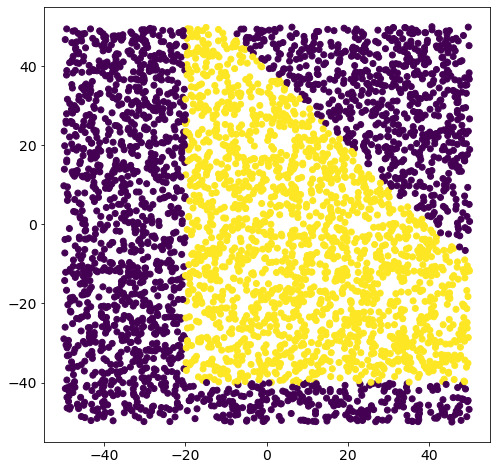

In [19]:
import numpy as np
TYPE = 1
x = np.loadtxt(filename("data",TYPE), delimiter=" ")
y = np.loadtxt(filename("labels",TYPE), delimiter=" ")

# dim of samaple
L = len(x[0])
print(L)

for i in range(10):
    print(x[i], y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [20]:
(x_train, y_train) = (x[0:N_train], y[0:N_train])
(x_valid, y_valid) = (x[N_train:], y[N_train:])
print("Train:", len(x_train), "\t Validation:", len(x_valid))





Train: 3200 	 Validation: 800


In [21]:
def Rescale(x):
    # return (x - x.mean())/np.sqrt(x.var())
    return x/(B/2)
x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [22]:
np.random.seed(12345)
#def create_model(case = 1, optimizer = "adam", dropout_rate = 0.2, n_layers = 2,
#                 activation = 'relu', neurons = 20):
def create_DNN(case = 1):
  if case == 1:
      model = Sequential()
      model.add(Dense(L, input_shape=(L,), activation='relu'))
      model.add(Dense(20, activation='relu'))
      model.add(Dense(20, activation='relu'))
      model.add(Dropout(0.2))
      model.add(Dense(1, activation='sigmoid'))
      nepoch = 400
  if case == 2:
      model = Sequential()
      model.add(Dense(L, input_shape=(L,), activation='sigmoid'))
      model.add(Dense(3, activation='sigmoid'))
      model.add(Dense(1, activation='sigmoid'))
      nepoch = 400
  return model

#model  = create_model(case = 1, optimizer = "adam",dropout_rate = 0.2,n_layers = 2,
#                      activation = 'relu', neurons = 20)

#model.summary()



In [23]:
loss = 'binary_crossentropy' 
optimizer = 'adam'           
metrics = ['accuracy']
def compile_model(case = 1, optimizer = "adam",dropout_rate = 0.2,n_layers = 2,
                      activation = 'relu', neurons = 20):
    # create the model
    model=create_DNN(case=case)
    # compile the model
    model.compile(loss=keras.losses.binary_crossentropy,
                 optimizer=optimizer,
                metrics=['accuracy'])
    return model

model = compile_model()

model.summary()


Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 2)                 6         
                                                                 
 dense_121 (Dense)           (None, 20)                60        
                                                                 
 dense_122 (Dense)           (None, 20)                420       
                                                                 
 dropout_30 (Dropout)        (None, 20)                0         
                                                                 
 dense_123 (Dense)           (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________


In [24]:
fit = model.fit(x_train, y_train, epochs=400, batch_size=50, validation_data=(x_valid, y_valid),
               verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.6723 - accuracy: 0.6475 - val_loss: 0.6457 - val_accuracy: 0.6787 - 731ms/epoch - 11ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6371 - accuracy: 0.6841 - val_loss: 0.6168 - val_accuracy: 0.6862 - 181ms/epoch - 3ms/step
Epoch 3/400
64/64 - 0s - loss: 0.6126 - accuracy: 0.7013 - val_loss: 0.5979 - val_accuracy: 0.6950 - 129ms/epoch - 2ms/step
Epoch 4/400
64/64 - 0s - loss: 0.5896 - accuracy: 0.7075 - val_loss: 0.5772 - val_accuracy: 0.7088 - 125ms/epoch - 2ms/step
Epoch 5/400
64/64 - 0s - loss: 0.5639 - accuracy: 0.7259 - val_loss: 0.5503 - val_accuracy: 0.7150 - 137ms/epoch - 2ms/step
Epoch 6/400
64/64 - 0s - loss: 0.5358 - accuracy: 0.7419 - val_loss: 0.5219 - val_accuracy: 0.7350 - 130ms/epoch - 2ms/step
Epoch 7/400
64/64 - 0s - loss: 0.5039 - accuracy: 0.7575 - val_loss: 0.4891 - val_accuracy: 0.7613 - 139ms/epoch - 2ms/step
Epoch 8/400
64/64 - 0s - loss: 0.4729 - accuracy: 0.7800 - val_loss: 0.4503 - val_accuracy: 0.7875 - 133ms/epoch - 2ms/step
Epoch 9

In [25]:
history = model.fit(x_train, y_train, epochs=400, batch_size=50, validation_data=(x_valid, y_valid))

Epoch 1/400
64/64 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9903 - val_loss: 0.0113 - val_accuracy: 0.9962
Epoch 2/400
64/64 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.9903 - val_loss: 0.0546 - val_accuracy: 0.9800
Epoch 3/400
64/64 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9906 - val_loss: 0.0104 - val_accuracy: 0.9975
Epoch 4/400
64/64 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 0.9925 - val_loss: 0.0092 - val_accuracy: 0.9962
Epoch 5/400
64/64 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9903 - val_loss: 0.0104 - val_accuracy: 0.9962
Epoch 6/400
64/64 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.9906 - val_loss: 0.0153 - val_accuracy: 0.9950
Epoch 7/400
64/64 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9922 - val_loss: 0.0090 - val_accuracy: 0.9962
Epoch 8/400
6

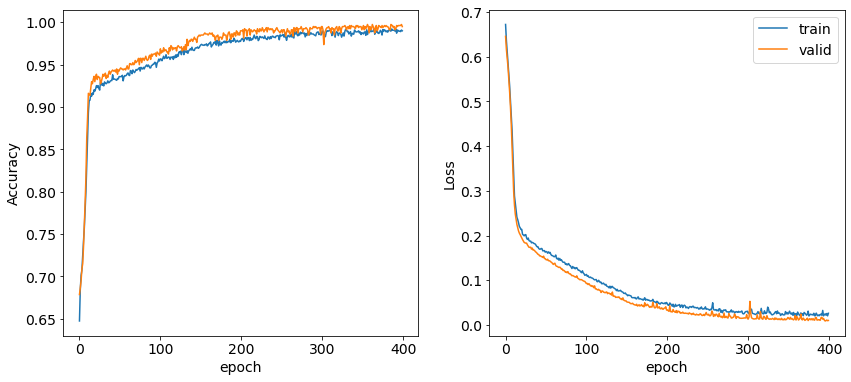

In [26]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid")
ax.set_xlabel('epoch')
ax.set_ylabel('Accuracy')
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid")
ax.set_xlabel('epoch')
ax.set_ylabel('Loss')
ax.legend()

In [76]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import layers
from tensorflow.keras import activations
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
from keras.constraints import maxnorm

# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=compile_model,epochs=1, verbose=1)

#other parameters
activations = [ 'sigmoid','relu','elu']
dropout_rates = [ 0.2, 0.4, 0.6]
n_layers=[4,6,8]
neurons = [20, 25, 30]
#batch_size = [50,70,90]
#epochs = [200, 400, 500]


# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adam', 'Adagrad', 'Adadelta','Adamax', 'Nadam']
# define parameter dictionary
#param_grid = dict( epochs=epochs, batch_size=batch_size)
param_grid = dict(optimizer=optimizer)#dict(optimizer=optimizer,activation=activations, n_layers=n_layers, neurons=neurons, dropout_rate=dropout_rates)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result1 = grid.fit(x_train, y_train, validation_data=(x_valid, y_valid))

# summarize results
print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))

means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  del sys.path[0]


100/100 [==============================] - 3s 7ms/step - loss: 0.6755 - accuracy: 0.5384 - val_loss: 0.6472 - val_accuracy: 0.5850
Best: 0.639375 using {'optimizer': 'Nadam'}
0.599062 (0.081932) with: {'optimizer': 'SGD'}
0.589375 (0.082974) with: {'optimizer': 'RMSprop'}
0.593437 (0.067589) with: {'optimizer': 'Adam'}
0.553750 (0.114731) with: {'optimizer': 'Adagrad'}
0.490313 (0.049469) with: {'optimizer': 'Adadelta'}
0.620312 (0.058399) with: {'optimizer': 'Adamax'}
0.639375 (0.038002) with: {'optimizer': 'Nadam'}


In [77]:
param_grid = dict(optimizer=optimizer,activation=activations)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result2 = grid.fit(x_train, y_train, validation_data=(x_valid, y_valid))

# summarize results
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))

means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

100/100 [==============================] - 1s 5ms/step - loss: 0.6720 - accuracy: 0.5512 - val_loss: 0.6434 - val_accuracy: 0.5962
Best: 0.690625 using {'activation': 'relu', 'optimizer': 'Adam'}
0.537500 (0.027937) with: {'activation': 'sigmoid', 'optimizer': 'SGD'}
0.667812 (0.026902) with: {'activation': 'sigmoid', 'optimizer': 'RMSprop'}
0.629687 (0.047247) with: {'activation': 'sigmoid', 'optimizer': 'Adam'}
0.513438 (0.040004) with: {'activation': 'sigmoid', 'optimizer': 'Adagrad'}
0.557500 (0.063010) with: {'activation': 'sigmoid', 'optimizer': 'Adadelta'}
0.555937 (0.016709) with: {'activation': 'sigmoid', 'optimizer': 'Adamax'}
0.621250 (0.072903) with: {'activation': 'sigmoid', 'optimizer': 'Nadam'}
0.553125 (0.044305) with: {'activation': 'relu', 'optimizer': 'SGD'}
0.661875 (0.078075) with: {'activation': 'relu', 'optimizer': 'RMSprop'}
0.690625 (0.037806) with: {'activation': 'relu', 'optimizer': 'Adam'}
0.535625 (0.029108) with: {'activation': 'relu', 'optimizer': 'Adagra

In [30]:
param_grid = dict(optimizer=optimizer,activation=activations,dropout_rate=dropout_rates)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result3 = grid.fit(x_train, y_train, validation_data=(x_valid, y_valid))

# summarize results
print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))

means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

100/100 [==============================] - 1s 4ms/step - loss: 0.6807 - accuracy: 0.6153 - val_loss: 0.6730 - val_accuracy: 0.6200
Best: 0.659375 using {'activation': 'elu', 'dropout_rate': 0.2, 'optimizer': 'Nadam'}
0.531875 (0.099673) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'optimizer': 'SGD'}
0.641563 (0.015597) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'optimizer': 'RMSprop'}
0.643438 (0.040479) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'optimizer': 'Adam'}
0.544687 (0.088447) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'optimizer': 'Adagrad'}
0.551563 (0.024943) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'optimizer': 'Adadelta'}
0.617188 (0.027872) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'optimizer': 'Adamax'}
0.659062 (0.071109) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'optimizer': 'Nadam'}
0.506875 (0.038084) with: {'activation': 'sigmoid', 'dropout_rate': 0.4, 'optimizer': 'SGD'}
0.645313 (0.023375) 

In [78]:
param_grid = dict(optimizer=optimizer,activation=activations, dropout_rate=dropout_rates, neurons=neurons)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result4 = grid.fit(x_train, y_train, validation_data=(x_valid, y_valid))

# summarize results
print("Best: %f using %s" % (grid_result4.best_score_, grid_result4.best_params_))

means = grid_result4.cv_results_['mean_test_score']
stds = grid_result4.cv_results_['std_test_score']
params = grid_result4.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

100/100 [==============================] - 1s 5ms/step - loss: 0.6846 - accuracy: 0.6122 - val_loss: 0.6785 - val_accuracy: 0.6388
Best: 0.705937 using {'activation': 'relu', 'dropout_rate': 0.2, 'neurons': 20, 'optimizer': 'Nadam'}
0.570938 (0.104345) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'neurons': 20, 'optimizer': 'SGD'}
0.654062 (0.094738) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'neurons': 20, 'optimizer': 'RMSprop'}
0.651875 (0.043161) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'neurons': 20, 'optimizer': 'Adam'}
0.523438 (0.054539) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'neurons': 20, 'optimizer': 'Adagrad'}
0.547813 (0.088774) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'neurons': 20, 'optimizer': 'Adadelta'}
0.579375 (0.059454) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'neurons': 20, 'optimizer': 'Adamax'}
0.644687 (0.067727) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'neurons': 20, 'optimizer': '

In [79]:
param_grid = dict(optimizer=optimizer,activation=activations, dropout_rate=dropout_rates, n_layers=n_layers,)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result5 = grid.fit(x_train, y_train, validation_data=(x_valid, y_valid))

# summarize results
print("Best: %f using %s" % (grid_result5.best_score_, grid_result5.best_params_))

means = grid_result5.cv_results_['mean_test_score']
stds = grid_result5.cv_results_['std_test_score']
params = grid_result5.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



100/100 [==============================] - 1s 5ms/step - loss: 0.6348 - accuracy: 0.5738 - val_loss: 0.5918 - val_accuracy: 0.6488
Best: 0.693125 using {'activation': 'relu', 'dropout_rate': 0.2, 'n_layers': 8, 'optimizer': 'RMSprop'}
0.605312 (0.044951) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'optimizer': 'SGD'}
0.582187 (0.076298) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'optimizer': 'RMSprop'}
0.664687 (0.029546) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'optimizer': 'Adam'}
0.552500 (0.041824) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'optimizer': 'Adagrad'}
0.521250 (0.143290) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'optimizer': 'Adadelta'}
0.539375 (0.096073) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'optimizer': 'Adamax'}
0.664687 (0.024034) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'optimizer':

In [33]:
results = pd.DataFrame.from_dict(grid_result.cv_results_)
results.to_csv('Grid_Search_Results.csv')
df_GridSearch = pd.read_csv('Grid_Search_Results.csv', index_col = False)
df_GridSearch = df_GridSearch.iloc[:,1:]
df_GridSearch.sort_values(by = "rank_test_score", ascending = True)
df_GridSearch

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_dropout_rate,param_n_layers,param_optimizer,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.858718,0.160168,0.203942,0.004840,sigmoid,0.2,4,SGD,"{'activation': 'sigmoid', 'dropout_rate': 0.2,...",0.57125,0.54750,0.68750,0.64500,0.612813,0.056141,61
1,1.222231,0.209028,0.208788,0.011349,sigmoid,0.2,4,RMSprop,"{'activation': 'sigmoid', 'dropout_rate': 0.2,...",0.63500,0.49625,0.66625,0.57250,0.592500,0.065018,87
2,0.933684,0.136199,0.231631,0.046636,sigmoid,0.2,4,Adam,"{'activation': 'sigmoid', 'dropout_rate': 0.2,...",0.55000,0.59875,0.62875,0.70250,0.620000,0.055305,51
3,0.947924,0.162324,0.203254,0.004283,sigmoid,0.2,4,Adagrad,"{'activation': 'sigmoid', 'dropout_rate': 0.2,...",0.55000,0.32375,0.63875,0.25500,0.441875,0.157581,183
4,1.237049,0.207627,0.202874,0.004124,sigmoid,0.2,4,Adadelta,"{'activation': 'sigmoid', 'dropout_rate': 0.2,...",0.45000,0.49625,0.64000,0.32625,0.478125,0.112238,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,1.152297,0.010585,0.256196,0.033489,elu,0.6,8,Adam,"{'activation': 'elu', 'dropout_rate': 0.6, 'n_...",0.58500,0.66500,0.63500,0.59000,0.618750,0.033048,54
185,1.028832,0.170423,0.280814,0.033553,elu,0.6,8,Adagrad,"{'activation': 'elu', 'dropout_rate': 0.6, 'n_...",0.55000,0.63000,0.59000,0.39750,0.541875,0.088023,132
186,1.066512,0.102295,0.229008,0.005311,elu,0.6,8,Adadelta,"{'activation': 'elu', 'dropout_rate': 0.6, 'n_...",0.48500,0.46750,0.57250,0.57250,0.524375,0.048521,151
187,0.966744,0.109204,0.263886,0.029711,elu,0.6,8,Adamax,"{'activation': 'elu', 'dropout_rate': 0.6, 'n_...",0.51750,0.49625,0.63500,0.65000,0.574687,0.068433,110


In [80]:
from keras.engine import sequential
N = 400
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])


#second grid search:
model2 = Sequential()
model2.add(Dense(L,input_shape=(L,),activation='relu'))
model2.add(Dense(20,activation='relu'))
model2.add(Dense(20,activation='relu'))
model2.add(Dropout(0)) #the default value is 0
model2.add(Dense(1,activation='sigmoid'))

nepoch=400
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


#third grid search:
model3 = Sequential()
model3.add(Dense(L,input_shape=(L,),activation='elu'))
model3.add(Dense(20,activation='elu'))
model3.add(Dense(20,activation='elu'))
model3.add(Dropout(0.2))
model3.add(Dense(1,activation='sigmoid'))
nepoch=400

model.compile(loss='binary_crossentropy',
              optimizer='Nadam',
              metrics=['accuracy'])

#forth grid search:
model4 = Sequential()
model4.add(Dense(L,input_shape=(L,),activation='elu'))
model4.add(Dense(30,activation='elu'))
model4.add(Dense(30,activation='elu'))
model4.add(Dropout(0.6))
model4.add(Dense(1,activation='sigmoid'))
nepoch=400
model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

#fifth grid search
model5 = Sequential()
model5.add(Dense(L,input_shape=(L,),activation='relu'))
model5.add(Dense(20,activation='relu'))
model5.add(Dense(20,activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(1,activation='sigmoid'))
nepoch=400
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
fit = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

fit = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)
fit = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

AttributeError: ignored

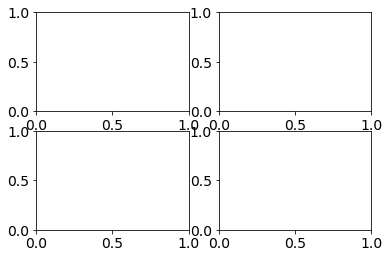

In [81]:
fig, AX = plt.subplots(2, 2)
ax = AX[0, 0]
ax.plot(grid_search2.history['accuracy'], label = 'relu/adam')
ax.plot(grid_search3.history['accuracy'], label = 'elu/0.2/Nadam')
ax.plot(grid_search4.history['accuracy'], label = 'elu/0.6/30/RMSprop')
ax.plot(grid_search5.history['accuracy'], label = '')

ax = AX[0, 1]
ax.plot(grid_search2.history['loss'], label = 'relu/adam')
ax.plot(grid_search3.history['loss'], label = 'elu/0.2/Nadam')
ax.plot(grid_search4.history['loss'], label = 'elu/0.6/30/RMSprop')
ax.plot(grid_search5.history['loss'], label = '')

ax = AX[1, 0]
ax.plot(grid_search2.history['val_accuracy'], label = 'relu/adam')
ax.plot(grid_search3.history['val_accuracy'], label = 'elu/0.2/Nadam')
ax.plot(grid_search4.history['val_accuracy'], label = 'elu/0.6/30/RMSprop')
ax.plot(grid_result5.history['val_accuracy'], label = '')

ax = AX[1, 1]
ax.plot(grid_result2.history['val_loss'], label = 'relu/adam')
ax.plot(grid_result3.history['val_loss'], label = 'elu/0.2/Nadam')
ax.plot(grid_result4.history['val_loss'], label = 'elu/0.6/30/RMSprop')
ax.plot(grid_result5.history['val_loss'], label = '')

plt.legend(loc = 'best')



In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (600, 300))




<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b9db06e8-b879-40eb-b8fc-8366232e2a44' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>